- [Reference](https://www.analyticsvidhya.com/blog/2021/06/complete-guide-on-how-to-use-autoencoders-in-python/)

In [1]:
import keras
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
X_train=[[0.5,0.2,0.3]]

autoencoder = keras.models.Sequential([encoder, decoder])

#compile the model
autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.1))

#train the model
history = autoencoder.fit(X_train, X_train, epochs=200)

# encode the data
codings = encoder.predict(X_train)

# decode the encoder output
decodings = decoder.predict(codings)
decodings

C:\Users\ganap\.conda\envs\machine_learning\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 0.5810
Epoch 2/200
1/1 [==============================] - 0s 16ms/step - loss: 0.3569
Epoch 3/200
1/1 [==============================] - 0s 17ms/step - loss: 0.2376
Epoch 4/200
1/1 [==============================] - 0s 18ms/step - loss: 0.1672
Epoch 5/200
1/1 [==============================] - 0s 13ms/step - loss: 0.1226
Epoch 6/200
1/1 [==============================] - 0s 11ms/step - loss: 0.0930
Epoch 7/200
1/1 [==============================] - 0s 10ms/step - loss: 0.0724
Epoch 8/200
1/1 [==============================] - 0s 16ms/step - loss: 0.0575
Epoch 9/200
1/1 [==============================] - 0s 16ms/step - loss: 0.0466
Epoch 10/200
1/1 [==============================] - 0s 16ms/step - loss: 0.0382
Epoch 11/200
1/1 [==============================] - 0s 16ms/step - loss: 0.0317
Epoch 12/200
1/1 [==============================] - 0s 8ms/step - loss: 0.0266
Epoch 13/200
1/1 [==============================] - 

1/1 [==============================] - 0s 10ms/step - loss: 8.0191e-08
Epoch 101/200
1/1 [==============================] - 0s 10ms/step - loss: 6.9512e-08
Epoch 102/200
1/1 [==============================] - 0s 11ms/step - loss: 6.0259e-08
Epoch 103/200
1/1 [==============================] - 0s 8ms/step - loss: 5.2240e-08
Epoch 104/200
1/1 [==============================] - 0s 10ms/step - loss: 4.5281e-08
Epoch 105/200
1/1 [==============================] - 0s 22ms/step - loss: 3.9256e-08
Epoch 106/200
1/1 [==============================] - 0s 21ms/step - loss: 3.4030e-08
Epoch 107/200
1/1 [==============================] - 0s 11ms/step - loss: 2.9503e-08
Epoch 108/200
1/1 [==============================] - 0s 0s/step - loss: 2.5574e-08
Epoch 109/200
1/1 [==============================] - 0s 9ms/step - loss: 2.2168e-08
Epoch 110/200
1/1 [==============================] - 0s 8ms/step - loss: 1.9219e-08
Epoch 111/200
1/1 [==============================] - 0s 13ms/step - loss: 1.6661e-08

1/1 [==============================] - 0s 8ms/step - loss: 1.0429e-13
Epoch 198/200
1/1 [==============================] - 0s 9ms/step - loss: 1.0214e-13
Epoch 199/200
1/1 [==============================] - 0s 10ms/step - loss: 1.0014e-13
Epoch 200/200
1/1 [==============================] - 0s 45ms/step


array([[0.49999958, 0.19999984, 0.29999977]], dtype=float32)

In [3]:
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from keras import Input, Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [4]:
encoding_dim = 15 
input_img = Input(shape=(784,))
# encoded representation of input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# decoded representation of code 
decoded = Dense(784, activation='sigmoid')(encoded)
# Model which take input image and shows decoded images
autoencoder = Model(input_img, decoded)

In [5]:
# This model shows encoded images
encoder = Model(input_img, encoded)
# Creating a decoder model
encoded_input = Input(shape=(encoding_dim,))
# last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [6]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 3s 0us/step
(60000, 784)
(10000, 784)


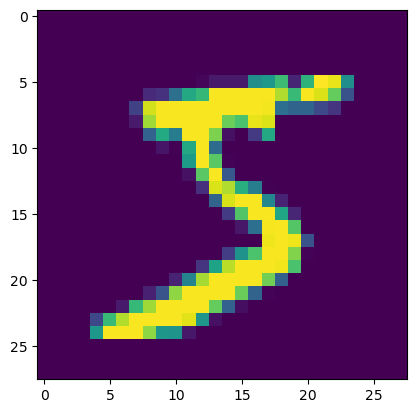

In [8]:
plt.imshow(x_train[0].reshape(28,28))

In [9]:
autoencoder.fit(x_train, x_train,
                epochs=15,
                batch_size=256,
                validation_data=(x_test, x_test))

Epoch 1/15
235/235 [==============================] - 4s 13ms/step - loss: 0.3053 - val_loss: 0.2171
Epoch 2/15
235/235 [==============================] - 3s 12ms/step - loss: 0.1984 - val_loss: 0.1820
Epoch 3/15
235/235 [==============================] - 3s 11ms/step - loss: 0.1737 - val_loss: 0.1639
Epoch 4/15
235/235 [==============================] - 2s 10ms/step - loss: 0.1595 - val_loss: 0.1527
Epoch 5/15
235/235 [==============================] - 2s 7ms/step - loss: 0.1508 - val_loss: 0.1469
Epoch 6/15
235/235 [==============================] - 1s 6ms/step - loss: 0.1466 - val_loss: 0.1438
Epoch 7/15
235/235 [==============================] - 1s 6ms/step - loss: 0.1441 - val_loss: 0.1418
Epoch 8/15
235/235 [==============================] - 1s 6ms/step - loss: 0.1422 - val_loss: 0.1401
Epoch 9/15
235/235 [==============================] - 1s 6ms/step - loss: 0.1406 - val_loss: 0.1385
Epoch 10/15
235/235 [==============================] - 2s 7ms/step - loss: 0.1392 - val_loss: 0.

313/313 [==============================] - 1s 2ms/step


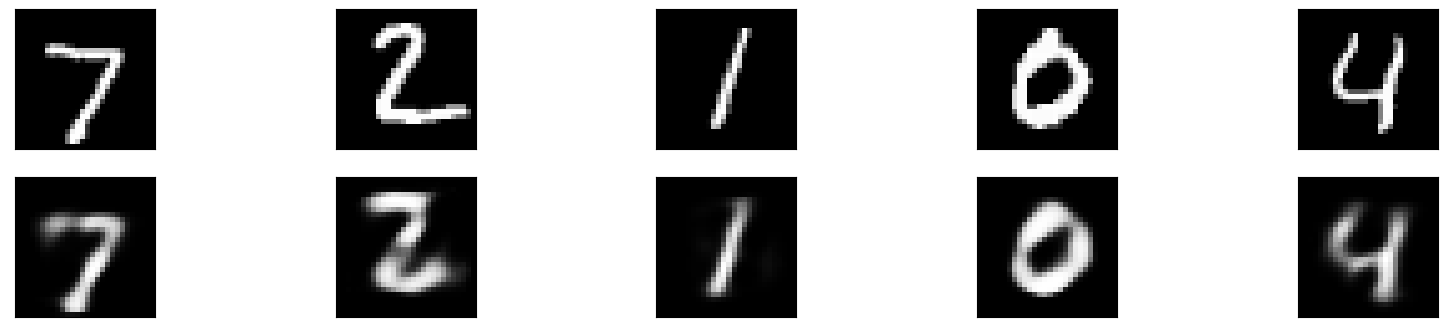

In [10]:
encoded_img = encoder.predict(x_test)
decoded_img = decoder.predict(encoded_img)
plt.figure(figsize=(20, 4))
for i in range(5):
    # Display original
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, 5, i + 1 + 5)
    plt.imshow(decoded_img[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()